In [208]:
import pandas as pd
import numpy as np

In [209]:
data=pd.read_csv("C:\\Users\\Lenovo\\Downloads\\ML project\\zomato_reg\\data.csv")
data=pd.DataFrame(data)
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Lenovo\\Downloads\\ML project\\zomato_reg\\data.csv'

In [3]:
data.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken_min'],
      dtype='object')

In [210]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

In [211]:
print(data['Weather_conditions'].value_counts())
print('='*32)
print(data['Road_traffic_density'].value_counts())
print('='*32)
print(data['Type_of_order'].value_counts())
print('='*32)
print(data['Vehicle_condition'].value_counts())
print('='*32)
print(data['Type_of_vehicle'].value_counts())
print('='*32)
print(data['multiple_deliveries'].value_counts())
print('='*32)
print(data['Festival'].value_counts())
print('='*32)
print(data['City'].value_counts())
print('='*32)

Weather_conditions
Fog           7653
Stormy        7584
Cloudy        7533
Sandstorms    7494
Windy         7422
Sunny         7282
Name: count, dtype: int64
Road_traffic_density
Low       15476
Jam       14139
Medium    10945
High       4423
Name: count, dtype: int64
Type_of_order
Snack     11530
Meal      11456
Drinks    11321
Buffet    11277
Name: count, dtype: int64
Vehicle_condition
2    15031
1    15028
0    15005
3      520
Name: count, dtype: int64
Type_of_vehicle
motorcycle          26429
scooter             15273
electric_scooter     3814
bicycle                68
Name: count, dtype: int64
multiple_deliveries
1.0    28151
0.0    14094
2.0     1985
3.0      361
Name: count, dtype: int64
Festival
No     44460
Yes      896
Name: count, dtype: int64
City
Metropolitian    34087
Urban            10133
Semi-Urban         164
Name: count, dtype: int64


In [212]:
data.isna().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken_min                    0
dtype: int64

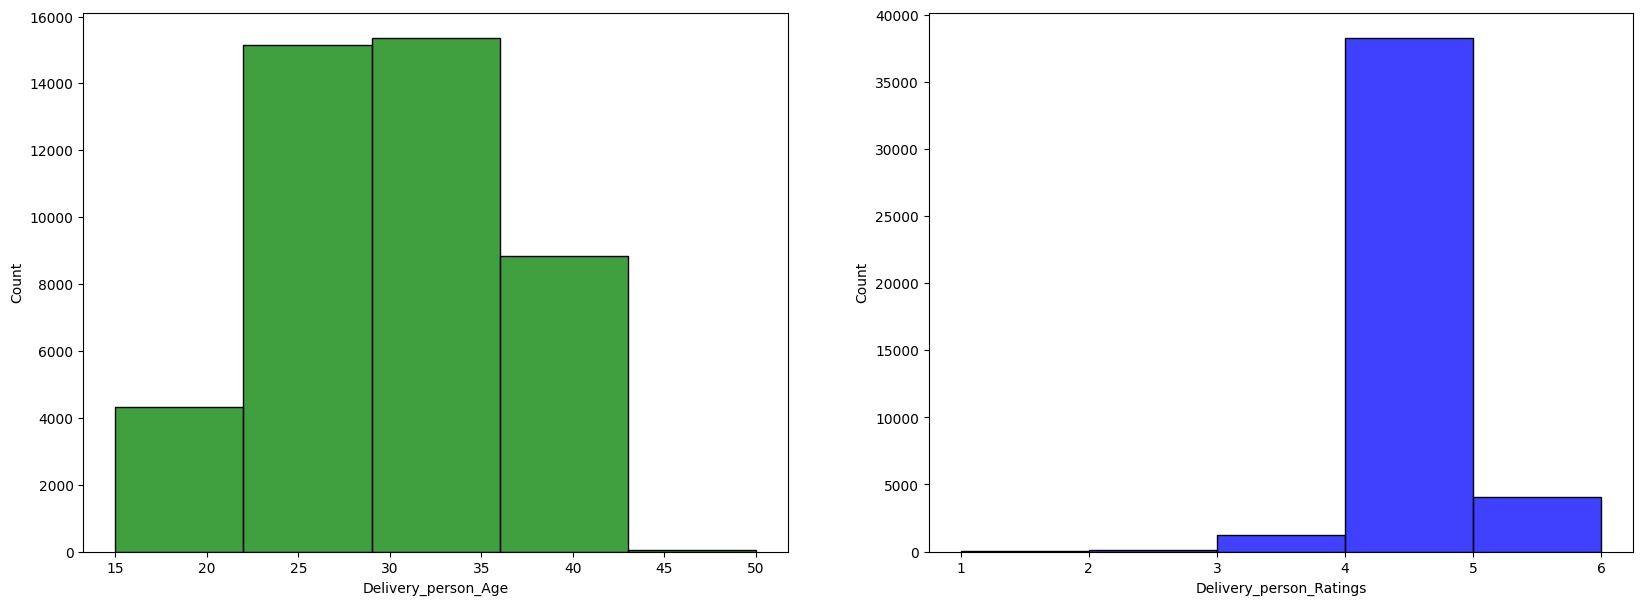

In [213]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(20, 7))
plt.subplot(121)
sns.histplot(data['Delivery_person_Age'],bins=5,color='g')
plt.subplot(122)
sns.histplot(data['Delivery_person_Ratings'],bins=5,color='b')

plt.show()

Observations:
1. The maximum or overall oveservation of Delivery_person_age lie in the range between 20 to 40, with high distribution in range between 25-35 years of age. Hence we will use median value for updating the NaN type datas.
2. The Delivery_person_rating has a good rating of range from 4 to 5 as the maximum.

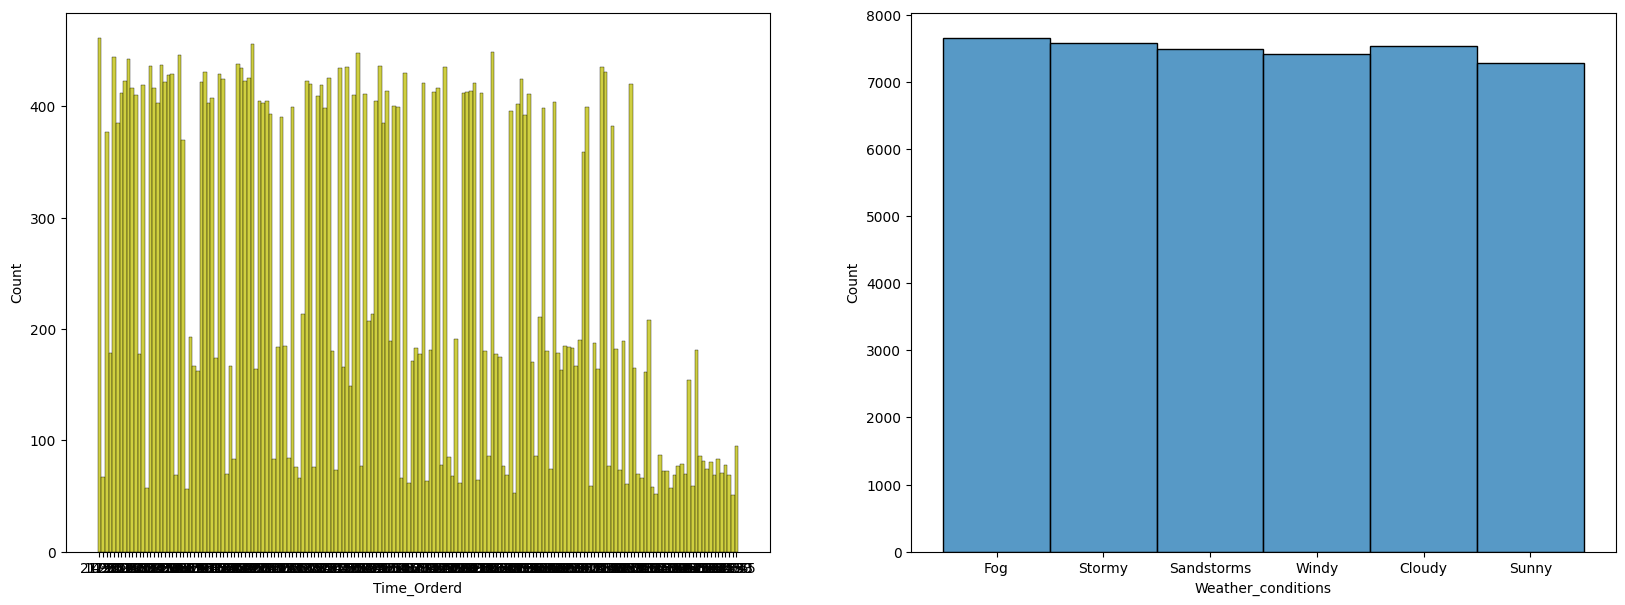

In [214]:
axs,fig =plt.subplots(1,2,figsize=(20,7))
plt.subplot(121)
sns.histplot(data['Time_Orderd'],color='y')
plt.subplot(122)
sns.histplot(data['Weather_conditions'],bins=20)
plt.show()

In [215]:
dfs=data['Time_Orderd'].fillna('0')
dd=dfs.values
ds=[]
for i in range(0,len(dd)):
    dss=str(dd[i])
    sp = dss.split(':')
    if len(sp) == 2:
        ss = sp[0] + '.' + sp[1]
    elif len(sp) == 3:
        ss = sp[0] + '.' + sp[1]
    else:
        ss=sp[0]
    ds.append(ss)
df=pd.DataFrame(ds)
df=df.astype(float)
df.tail()

,0
45579,11.35
45580,19.55
45581,23.50
45582,13.35
45583,17.10


In [216]:
dfs2=data['Time_Order_picked'].fillna('0')
dd2=dfs2.values
ds2=[]
for i in range(0,len(dd2)):
    dss2=str(dd2[i])
    sp2 = dss2.split(':')
    if len(sp2) == 2:
        ss = sp2[0] + '.' + sp2[1]
    elif len(sp2) == 3:
        ss = sp2[0] + '.' + sp2[1]
    else:
        ss=sp2[0]
    ds2.append(ss)
df2=pd.DataFrame(ds2)
df1=df2.astype(float)
df1.tail()


,0
45579,11.45
45580,20.10
45581,0.00
45582,13.40
45583,17.15


Coverting the time ordered and time order picked into total time taken between these activities as 'time_before_pick', by substracting both features. Dropping the Time_Order_picked and Time_Orderd as they are not necessary now.

In [217]:
data['Time_Order_picked']=df1
data['Time_Orderd']=df
data['time_before_pick']=data['Time_Order_picked']-data['Time_Orderd']
data.drop(columns=['Time_Orderd','Time_Order_picked'],axis=1,inplace=True)
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken_min,time_before_pick
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,0.55
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,0.50
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,0.10
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,0.10
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,0.55


#Distance Calculation

#Restaurant_latitude              
#Restaurant_longitude             
#Delivery_location_latitude        
#Delivery_location_longitude      

Find the value of the latitude in radians:
Value of Latitude in Radians, lat = Latitude / (180/pi) OR
Value of Latitude in Radians, lat = Latitude / 57.29577951
Find the value of longitude in radians:
Value of Longitude in Radians, long = Longitude / (180/pi) OR
Value of Longitude in Radians, long = Longitude / 57.29577951

Distance, d = 3963.0 * arccos[(sin(lat1) * sin(lat2)) + cos(lat1) * cos(lat2) * cos(long2 – long1)]

In [218]:
data['Restaurant_longitude']=data['Restaurant_longitude'].astype(float)
data['Delivery_location_longitude']=data['Delivery_location_longitude']
data['Restaurant_latitude']=data['Restaurant_latitude'].astype(float)
data['Delivery_location_latitude']=data['Delivery_location_latitude'].astype(float)



In [219]:
import pandas as pd
import math
def distance(lat1,lon1, lat2,lon2):
    # Radius of the Earth in kilometers
    radius = 6371

    # Convert latitude and longitude to radians
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1,lon1,lat2,lon2])

    # Calculate the differences between the latitudes and longitudes
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Calculate the Haversine formula
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    distance = radius * c

    return distance


In [220]:
dv = data.apply(lambda row:distance(row['Restaurant_latitude'],row['Restaurant_longitude'],row['Delivery_location_latitude'],row['Delivery_location_longitude']),axis=1)

In [223]:
df['distance']=pd.DataFrame(dv)

In [224]:
#merging this distance with the main dataframe and dropping the latititudes and longitudes.

data_copy=data.copy()
data_copy['distance']=df['distance']
data_copy.drop(columns=['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude'],axis=1,inplace=True)
data_copy.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken_min,time_before_pick,distance
0,0xcdcd,DEHRES17DEL01,36.0,4.2,12-02-2022,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,0.55,10.280582
1,0xd987,KOCRES16DEL01,21.0,4.7,13-02-2022,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,0.50,6.242319
2,0x2784,PUNERES13DEL03,23.0,4.7,04-03-2022,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,0.10,13.787860
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,13-02-2022,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,0.10,2.930258
4,0xdb64,KNPRES14DEL02,24.0,4.7,14-02-2022,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,0.55,19.396618


In [225]:
#converting order date to date time
data_copy['Order_Date']=pd.to_datetime(data_copy['Order_Date'],format='%d-%m-%Y')

In [226]:
#fill the nan values and check for outliers:
data_copy.isna().sum()

ID                            0
Delivery_person_ID            0
Delivery_person_Age        1854
Delivery_person_Ratings    1908
Order_Date                    0
Weather_conditions          616
Road_traffic_density        601
Vehicle_condition             0
Type_of_order                 0
Type_of_vehicle               0
multiple_deliveries         993
Festival                    228
City                       1200
Time_taken_min                0
time_before_pick              0
distance                      0
dtype: int64

In [227]:
data_copy['Delivery_person_Age']=data_copy['Delivery_person_Age'].fillna(data_copy['Delivery_person_Age'].median())
data_copy['Delivery_person_Ratings']=data_copy['Delivery_person_Ratings'].fillna(data_copy['Delivery_person_Ratings'].median())

WE will check specific params for converting the nan type values in categorical datasets. As there may be indirect dependencies on each other.

In [228]:
#Weather_conditions 
#Road_traffic_density        
#multiple_deliveries
#Festival  
#City    
data_traffic=data_copy['Road_traffic_density'].fillna('no_value',inplace=True)
data_traffic=data_copy[data_copy['Road_traffic_density']=='no_value']
print(data_traffic['City'].value_counts())
print(data_traffic['Festival'].value_counts())


City
Metropolitian    464
Urban            115
Semi-Urban         1
Name: count, dtype: int64
Festival
No     581
Yes     17
Name: count, dtype: int64


In [229]:
data_city=data_copy[data_copy['City']=='Metropolitian']
print(data_city['Road_traffic_density'].value_counts())
print(data_city['Festival'].value_counts())

Road_traffic_density
Jam         11087
Low         10852
Medium       8320
High         3364
no_value      464
Name: count, dtype: int64
Festival
No     33245
Yes      731
Name: count, dtype: int64


In [230]:
data_fest=data_copy[data_copy['Festival']=='No']
print(data_fest['Road_traffic_density'].value_counts())
print(data_fest['City'].value_counts())

Road_traffic_density
Low         15298
Jam         13469
Medium      10776
High         4336
no_value      581
Name: count, dtype: int64
City
Metropolitian    33245
Urban             9923
Semi-Urban         123
Name: count, dtype: int64


1. From aove we can come to some observation that when the 'City'  is Semi-Urban and 'Festival' is No, we can assume that the nan/ no-value type data can be converted into mode value which is 'Low'.The same goes for 'Urban'.
2. The same observation we find for 'City' and hence the nan value of 'Road_traffic_Density'goes to 'Low'.

In [231]:
data_copy['Road_traffic_density']=np.where(data_copy['Road_traffic_density']=='no_value','Low',data_copy['Road_traffic_density'])

In [232]:
data_copy['City'].fillna('no_v',inplace=True)
data_cit=data_copy[data_copy['City']=='no_v']

In [233]:
print(data_cit['Road_traffic_density'].value_counts())
print(data_cit['Festival'].value_counts())

Road_traffic_density
Low       553
Jam       291
Medium    258
High       98
Name: count, dtype: int64
Festival
No     1169
Yes      13
Name: count, dtype: int64


In [234]:
traffic_city=data_copy[data_copy['Road_traffic_density']=='Low']
traffic_city['City'].value_counts()

City
Metropolitian    11316
Urban             4207
no_v               553
Semi-Urban           1
Name: count, dtype: int64

1. From above combinatons it is evidant that for no_v or nan type values we can assume City as 'Metropolitian'. As because for such nan values cases we gt 'Road_traffic_denity'=='Low', which corresponds to the main dataframe and has maximum of 'Metropolitian' type city.
2. Festival dataset has high amount of 'No' data and we can take the mode value of 'No'. This will not affect the dataset.

In [235]:
data_copy['City']=np.where(data_copy['City']=='no_v','Metropolitian',data_copy['City'])

data_copy['Festival'].fillna('No',inplace=True)

In [236]:
data_copy['multiple_deliveries']=data_copy['multiple_deliveries'].fillna(data_copy['multiple_deliveries'].mode()[0])
data_copy['Weather_conditions']=data_copy['Weather_conditions'].fillna(data_copy['Weather_conditions'].mode()[0])

In [237]:
data_copy.isna().sum()

ID                         0
Delivery_person_ID         0
Delivery_person_Age        0
Delivery_person_Ratings    0
Order_Date                 0
Weather_conditions         0
Road_traffic_density       0
Vehicle_condition          0
Type_of_order              0
Type_of_vehicle            0
multiple_deliveries        0
Festival                   0
City                       0
Time_taken_min             0
time_before_pick           0
distance                   0
dtype: int64

In [238]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       45584 non-null  object        
 1   Delivery_person_ID       45584 non-null  object        
 2   Delivery_person_Age      45584 non-null  float64       
 3   Delivery_person_Ratings  45584 non-null  float64       
 4   Order_Date               45584 non-null  datetime64[ns]
 5   Weather_conditions       45584 non-null  object        
 6   Road_traffic_density     45584 non-null  object        
 7   Vehicle_condition        45584 non-null  int64         
 8   Type_of_order            45584 non-null  object        
 9   Type_of_vehicle          45584 non-null  object        
 10  multiple_deliveries      45584 non-null  float64       
 11  Festival                 45584 non-null  object        
 12  City                     45584 n

In [239]:
data1=data_copy.copy()
data1.drop(columns=['Time_taken_min'],axis=1,inplace=True)

In [240]:
data_num=[feature for feature in data1.columns if data1[feature].dtype!='O']
data_cat=[feature for feature in data1.columns if data1[feature].dtype=='O']
data_target=data_copy['Time_taken_min']
print(f'numerical values are: {data_num}')
print('='*32)
print(f'categorical values are: {data_cat}')
print("="*32)
print("target column is: 'Time_taken_min'")


numerical values are: ['Delivery_person_Age', 'Delivery_person_Ratings', 'Order_Date', 'Vehicle_condition', 'multiple_deliveries', 'time_before_pick', 'distance']
categorical values are: ['ID', 'Delivery_person_ID', 'Weather_conditions', 'Road_traffic_density', 'Type_of_order', 'Type_of_vehicle', 'Festival', 'City']
target column is: 'Time_taken_min'


<Axes: >

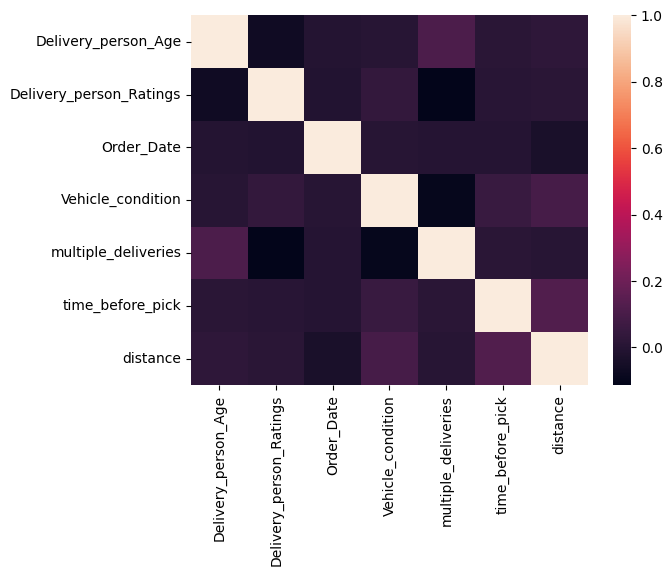

In [241]:
corr=data_copy[data_num].corr()
sns.heatmap(corr)

In [242]:
corr

,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Vehicle_condition,multiple_deliveries,time_before_pick,distance
Delivery_person_Age,1.000000,-0.067272,-0.005133,0.004649,0.111325,0.009303,0.023552
Delivery_person_Ratings,-0.067272,1.000000,-0.011901,0.037397,-0.112626,0.006471,0.010044
Order_Date,-0.005133,-0.011901,1.000000,0.003155,-0.002816,0.000179,-0.034711
Vehicle_condition,0.004649,0.037397,0.003155,1.000000,-0.095547,0.054027,0.092373
multiple_deliveries,0.111325,-0.112626,-0.002816,-0.095547,1.000000,0.011789,0.000844
time_before_pick,0.009303,0.006471,0.000179,0.054027,0.011789,1.000000,0.124358
distance,0.023552,0.010044,-0.034711,0.092373,0.000844,0.124358,1.000000


In [243]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=data_copy[data_num]
X=X.drop(columns=['Order_Date'],axis=1)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data['vif'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)



                   feature        vif
0      Delivery_person_Age  24.431766
1  Delivery_person_Ratings  25.171674
2        Vehicle_condition   2.531393
3      multiple_deliveries   2.774024
4         time_before_pick   1.019747
5                 distance   1.032027


From the above we can find the following assumptions:
1. No auto-correlation among numerical features
2. Little multi collinearity in the features. Only feature variable of Delivery_person_age and rating is high.

<Axes: xlabel='City', ylabel='count'>

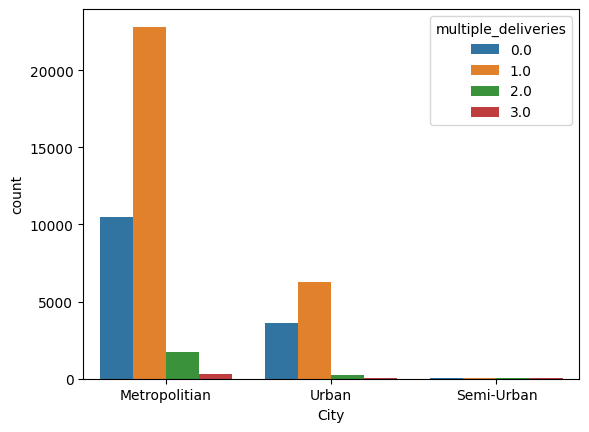

In [244]:
sns.countplot(data=data_copy,x='City',hue='multiple_deliveries')

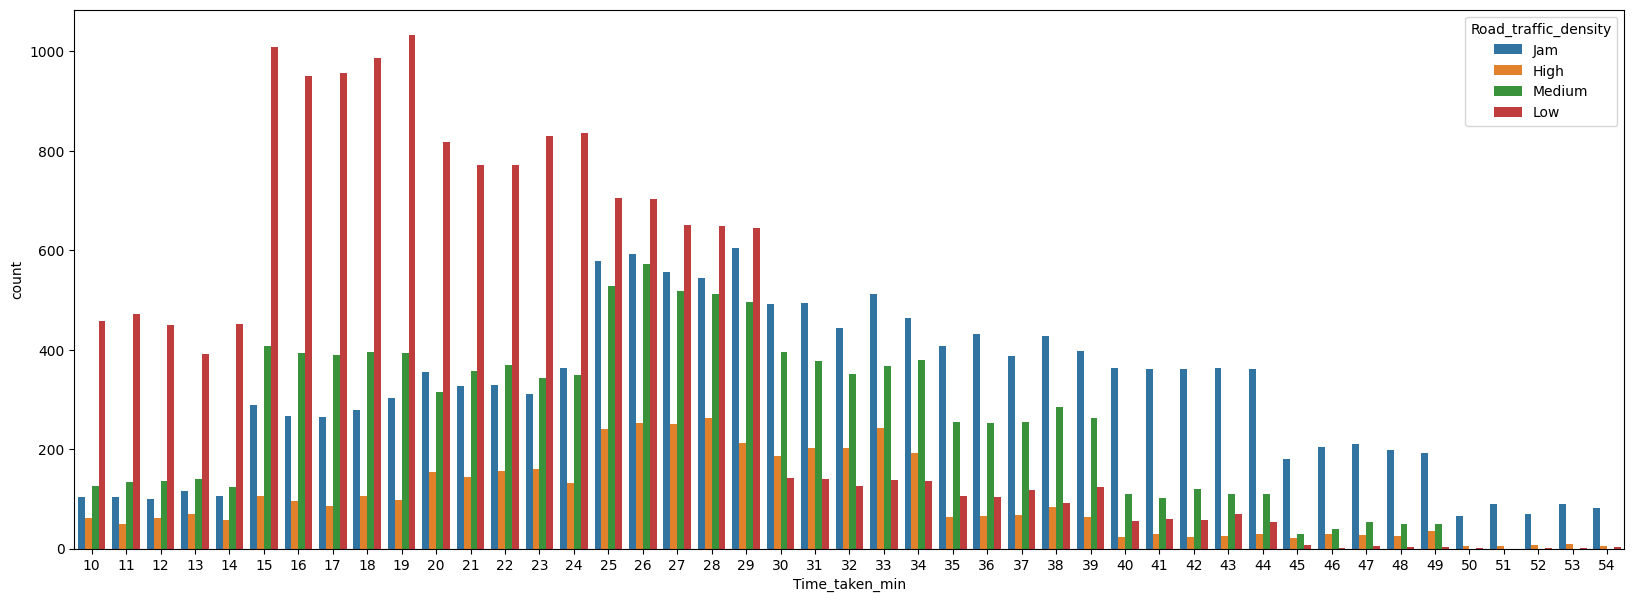

In [245]:
axs,fig =plt.subplots(1,1,figsize=(20,7))
plt.subplot(111)
sns.countplot(data=data_copy,x='Time_taken_min',hue='Road_traffic_density')
plt.show()

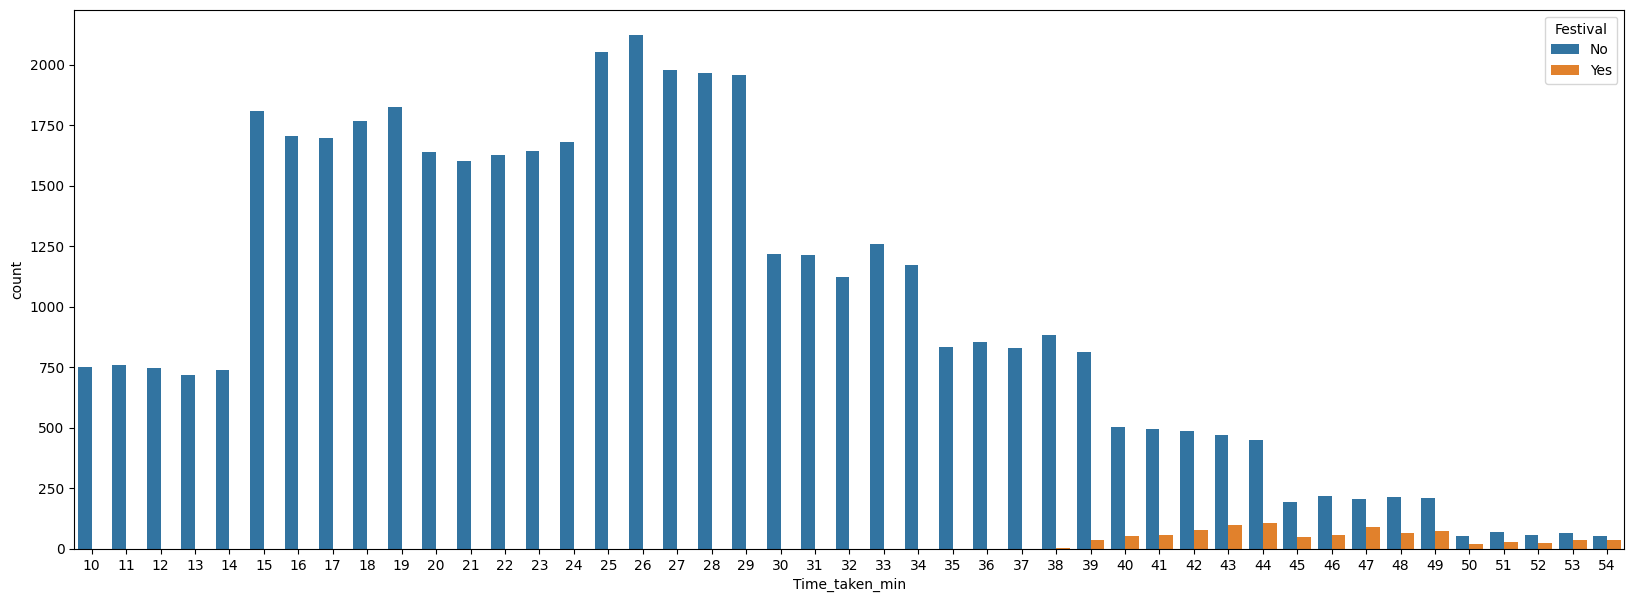

In [38]:
axs,fig =plt.subplots(1,1,figsize=(20,7))
plt.subplot(111)
sns.countplot(data=data_copy,x='Time_taken_min',hue='Festival')
plt.show()

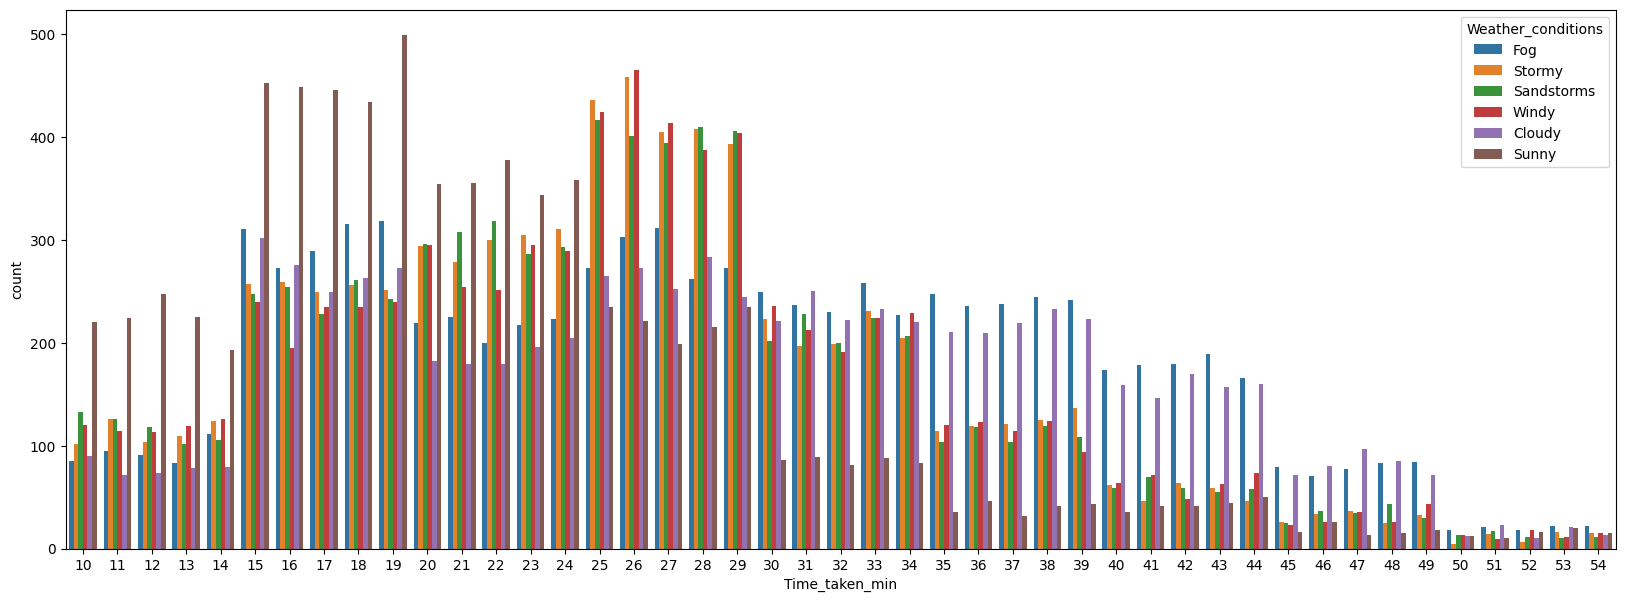

In [246]:
axs,fig =plt.subplots(1,1,figsize=(20,7))
plt.subplot(111)
sns.countplot(data=data_copy,x='Time_taken_min',hue='Weather_conditions')
plt.show()

In [251]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
enc_data = pd.DataFrame(enc.fit_transform(data_copy[['Weather_conditions', 'Road_traffic_density','Vehicle_condition','Type_of_order','Type_of_vehicle','multiple_deliveries','Festival','City']]).toarray())
  

In [252]:
column=['Weather_conditions_Cloudy','Weather_conditions_Fog', 'Weather_conditions_Sandstorms',
        'Weather_conditions_Stormy', 'Weather_conditions_Sunny',
        'Weather_conditions_Windy', 'Road_traffic_density_High','Road_traffic_density_Jam', 'Road_traffic_density_Low',
        'Road_traffic_density_Medium', 'Vehicle_condition_0',
        'Vehicle_condition_1', 'Vehicle_condition_2', 'Vehicle_condition_3',
        'Type_of_order_Buffet', 'Type_of_order_Drinks', 'Type_of_order_Meal',
        'Type_of_order_Snack', 'Type_of_vehicle_bicycle',
        'Type_of_vehicle_electric_scooter', 'Type_of_vehicle_motorcycle',
        'Type_of_vehicle_scooter', 'multiple_deliveries_0.0',
        'multiple_deliveries_1.0', 'multiple_deliveries_2.0',
        'multiple_deliveries_3.0', 'Festival_No', 'Festival_Yes',
        'City_Metropolitian', 'City_Semi-Urban', 'City_Urban']
enc_data.columns=column
enc_data.head()

,Weather_conditions_Cloudy,Weather_conditions_Fog,Weather_conditions_Sandstorms,Weather_conditions_Stormy,Weather_conditions_Sunny,Weather_conditions_Windy,Road_traffic_density_High,Road_traffic_density_Jam,Road_traffic_density_Low,Road_traffic_density_Medium,...,Type_of_vehicle_scooter,multiple_deliveries_0.0,multiple_deliveries_1.0,multiple_deliveries_2.0,multiple_deliveries_3.0,Festival_No,Festival_Yes,City_Metropolitian,City_Semi-Urban,City_Urban
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [253]:
embeded_data= data_copy.copy()
embeded_data=embeded_data.drop(columns=['Weather_conditions', 'Road_traffic_density','Vehicle_condition','Type_of_order','Type_of_vehicle','multiple_deliveries','Festival','City'])
new_df=embeded_data.join(enc_data)
new_df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Time_taken_min,time_before_pick,distance,Weather_conditions_Cloudy,Weather_conditions_Fog,...,Type_of_vehicle_scooter,multiple_deliveries_0.0,multiple_deliveries_1.0,multiple_deliveries_2.0,multiple_deliveries_3.0,Festival_No,Festival_Yes,City_Metropolitian,City_Semi-Urban,City_Urban
0,0xcdcd,DEHRES17DEL01,36.0,4.2,2022-02-12,46,0.55,10.280582,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1,0xd987,KOCRES16DEL01,21.0,4.7,2022-02-13,23,0.50,6.242319,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0x2784,PUNERES13DEL03,23.0,4.7,2022-03-04,21,0.10,13.787860,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,2022-02-13,20,0.10,2.930258,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0xdb64,KNPRES14DEL02,24.0,4.7,2022-02-14,41,0.55,19.396618,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


##### We will consider some changes here as few data are not needed for training and testing of data. Hence we can drop off column as: ID, Delivery_person_ID, Order_Date
##### Drop and append target column

In [254]:
new_df=new_df.drop(columns=['ID','Delivery_person_ID','Order_Date','Time_taken_min'])

In [255]:
new_df['Time_taken_min']=data_copy['Time_taken_min']
X=new_df.iloc[:,:-1]
y=new_df.iloc[:,-1]

In [256]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=42)

In [257]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

#### Model Training and prediction:
#### Following models we will use:
###### 1. Linear Regression
###### 2. L1,L2 and Elastic-net
###### 3. Decision Tree
###### 4. Random Forest


In [258]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

models={
    LinearRegression: LinearRegression(),
    'lasso': Lasso(),
    'Ridge': Ridge(),
    'ElasticNet':ElasticNet(),
    'DecisionTree': DecisionTreeRegressor(),
    'RandomForest': RandomForestRegressor()
}

#

In [259]:
def evaluate_models(X_train,X_test,y_train,y_test,models):
   
    report={}
    for i in range(len(models)):
        model=list(models.values())[i]
        #model trainning
        model.fit(X_train,y_train)
        y_test_predict=model.predict(X_test)
        model_test_score=r2_score(y_test,y_test_predict)

        report[list(models.keys())[i]]=model_test_score
    return report

In [260]:
model_report:dict=evaluate_models(X_train,X_test,y_train,y_test,models)
print(model_report)
print("="*32)
best_model_score=max(sorted(model_report.values()))
best_model_name=list(model_report.keys())[list(model_report.values()).index(best_model_score)]
best_model=models[best_model_name]
print(f"The best model performance is for: {best_model_name} and it has R2 score of : {best_model_score}")
print("="*32)

{<class 'sklearn.linear_model._base.LinearRegression'>: 0.5727043301430725, 'lasso': 0.47321571257392814, 'Ridge': 0.5727479370118731, 'ElasticNet': 0.48813996637729695, 'DecisionTree': 0.6547171656276194, 'RandomForest': 0.8126690465021571}
The best model performance is for: RandomForest and it has R2 score of : 0.8126690465021571


In [261]:
b_m=list(models.values())[list(model_report.values()).index(best_model_score)]
predict=b_m.predict(xx)

In [262]:
X_test.shape

(9117, 35)

In [263]:
predict

array([32.43])